## In-Class Assignment: Forecasting ROI with Neural Networks
#### Instructor: Justo E. Karell
#### Stevens Institute of Technology
#### CS 583: Deep Learning
#### July 15th, 2024
#### Name: Brendan Kenny

In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [2]:
# load data
cost_data = pd.read_csv('cost_over_time.csv')
return_data = pd.read_csv('return_over_time.csv')

In [3]:
data = pd.merge(cost_data, return_data)
data.head()

,Day,Cost,Return
0,1,104.967142,181.715034
1,2,103.584499,230.759983
2,3,110.061384,237.894966
3,4,125.291682,222.531978
4,5,122.950149,253.410789


In [4]:
# normalization
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [7]:
# splitting data to train and test
train_size = int(len(scaled_data) * 0.8)
train, test = scaled_data[:train_size], scaled_data[train_size:]

In [8]:
def create_dataset(dataset, seqlength=1):
    X, Y = [], []
    for i in range(len(dataset) - seqlength):
        a = dataset[i:(i + seqlength), :-1]
        X.append(a)
        Y.append(dataset[i + seqlength - 1, -1])
    return np.array(X), np.array(Y)


In [9]:
seqlength = 1
X_train, y_train = create_dataset(train, seqlength)
X_test, y_test = create_dataset(test, seqlength)

In [11]:
# neural network design
model = Sequential()
model.add(LSTM(50, input_shape=(seqlength, 2)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

I am choosing a LSTM (Long Short Term Memory) neural network because it captures temporal trends withinsequential data. We want to see if the cost and returns of the previous time steps have any impact on the future timesteps and that is something that LSTM excels at. This also gives control over how far back we are trying to look in the series, for example we can look 1 day back or multiple. The Dense layer is used to get the final output of the regression. 

In [12]:
history = model.fit(X_train, y_train, epochs=100, batch_size=1, validation_data=(X_test, y_test), verbose=2)

Epoch 1/100
79/79 - 2s - 21ms/step - loss: 0.1131 - val_loss: 0.0217
Epoch 2/100
79/79 - 0s - 2ms/step - loss: 0.0437 - val_loss: 0.0440
Epoch 3/100
79/79 - 0s - 2ms/step - loss: 0.0387 - val_loss: 0.0344
Epoch 4/100
79/79 - 0s - 2ms/step - loss: 0.0371 - val_loss: 0.0256
Epoch 5/100
79/79 - 0s - 2ms/step - loss: 0.0368 - val_loss: 0.0280
Epoch 6/100
79/79 - 0s - 2ms/step - loss: 0.0362 - val_loss: 0.0320
Epoch 7/100
79/79 - 0s - 2ms/step - loss: 0.0363 - val_loss: 0.0232
Epoch 8/100
79/79 - 0s - 2ms/step - loss: 0.0358 - val_loss: 0.0245
Epoch 9/100
79/79 - 0s - 2ms/step - loss: 0.0362 - val_loss: 0.0258
Epoch 10/100
79/79 - 0s - 2ms/step - loss: 0.0373 - val_loss: 0.0297
Epoch 11/100
79/79 - 0s - 2ms/step - loss: 0.0355 - val_loss: 0.0216
Epoch 12/100
79/79 - 0s - 2ms/step - loss: 0.0355 - val_loss: 0.0251
Epoch 13/100
79/79 - 0s - 2ms/step - loss: 0.0362 - val_loss: 0.0214
Epoch 14/100
79/79 - 0s - 2ms/step - loss: 0.0363 - val_loss: 0.0225
Epoch 15/100
79/79 - 0s - 2ms/step - loss:

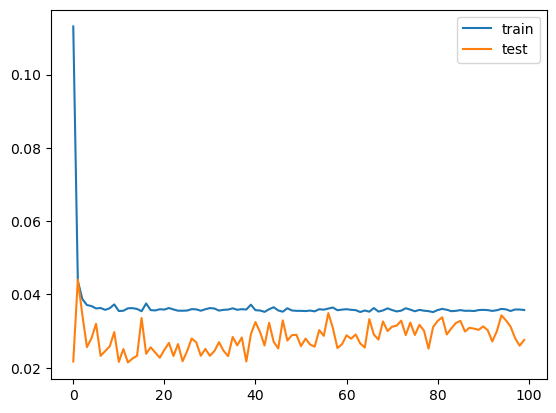

In [13]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [14]:
# trying with a longer sequence length
seqlength = 10
X_train, y_train = create_dataset(train, seqlength)
X_test, y_test = create_dataset(test, seqlength)

In [15]:
history = model.fit(X_train, y_train, epochs=100, batch_size=1, validation_data=(X_test, y_test), verbose=2)

Epoch 1/100
70/70 - 1s - 16ms/step - loss: 0.0683 - val_loss: 0.0211
Epoch 2/100
70/70 - 0s - 3ms/step - loss: 0.0396 - val_loss: 0.0323
Epoch 3/100
70/70 - 0s - 3ms/step - loss: 0.0368 - val_loss: 0.0422
Epoch 4/100
70/70 - 0s - 3ms/step - loss: 0.0365 - val_loss: 0.0239
Epoch 5/100
70/70 - 0s - 3ms/step - loss: 0.0377 - val_loss: 0.0302
Epoch 6/100
70/70 - 0s - 3ms/step - loss: 0.0371 - val_loss: 0.0353
Epoch 7/100
70/70 - 0s - 3ms/step - loss: 0.0382 - val_loss: 0.0434
Epoch 8/100
70/70 - 0s - 3ms/step - loss: 0.0382 - val_loss: 0.0436
Epoch 9/100
70/70 - 0s - 3ms/step - loss: 0.0367 - val_loss: 0.0404
Epoch 10/100
70/70 - 0s - 3ms/step - loss: 0.0366 - val_loss: 0.0336
Epoch 11/100
70/70 - 0s - 3ms/step - loss: 0.0370 - val_loss: 0.0238
Epoch 12/100
70/70 - 0s - 3ms/step - loss: 0.0371 - val_loss: 0.0443
Epoch 13/100
70/70 - 0s - 3ms/step - loss: 0.0365 - val_loss: 0.0291
Epoch 14/100
70/70 - 0s - 3ms/step - loss: 0.0364 - val_loss: 0.0321
Epoch 15/100
70/70 - 0s - 3ms/step - loss:

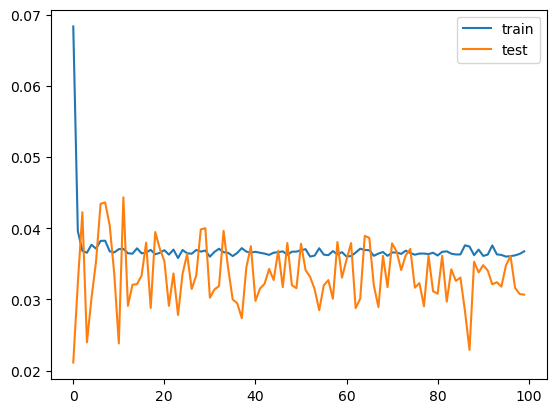

In [16]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

Neural Network Mathematical Formulation:

LSTM: ht = f(Wx * xt + Wh * ht-1 + b\
where \
ht is the hidden state\
f is the activation function\
Wx is weight matrix\
xt is input of current time step\
Wh is weight matrix being applied to previous hidden step\
ht-1 is the hidden state from the previous time step\
b is  bias\
\
Dense: yt = W * ht + b\
where \
W is weight matrix\
ht is output of LSTM layer (hidden state)\
b is bias\
yt is output

While comparing the train and test sets it appears they are both settling at around .035 loss which suggests that the model is not overfitting. I tried changing the sequence length by increasing it to see the impact that it has on the model. The overall validation error appears to settle around the same values for both test and train which suggests that the returns and cost looking further back may have little impact in the overall regression. I think attempting different activation functions would have been an approach to see if it could yield better performance. The default activation is 'tanh' but options such as 'sigmoid, or 'relu' could be better options.  